In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [51]:
# Specify the pattern to match your CSV files
file_pattern = 'MKL_double_*.csv'  # Update with the appropriate pattern

# Get a list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and read it into a DataFrame, then add it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_temp = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
df_double  = df_temp.sort_values(by = 'Size')
df_double['name'] = 'MKL'

In [52]:
# Specify the pattern to match your CSV files
file_pattern = 'OBLAS_double*.csv'  # Update with the appropriate pattern

# Get a list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and read it into a DataFrame, then add it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_temp = pd.concat(dfs, ignore_index=True)
df_temp = df_temp.sort_values(by = 'Size')
df_temp['name'] = "OpenBLAS"

In [54]:
df_double = pd.concat([df_double, df_temp])
print(df_double)

     Size       Time      GFLOPS      name
5    2000   0.498179   32.116987       MKL
6    2000   0.483585   33.086191       MKL
7    2000   0.268938   59.493303       MKL
8    2000   0.097498  164.106370       MKL
9    2000   0.187961   85.124012       MKL
..    ...        ...         ...       ...
60  20000  19.524734  819.473385  OpenBLAS
61  20000  16.677974  959.349131  OpenBLAS
62  20000  16.996171  941.388496  OpenBLAS
63  20000  16.808265  951.912665  OpenBLAS
64  20000  16.626913  962.295309  OpenBLAS

[190 rows x 4 columns]


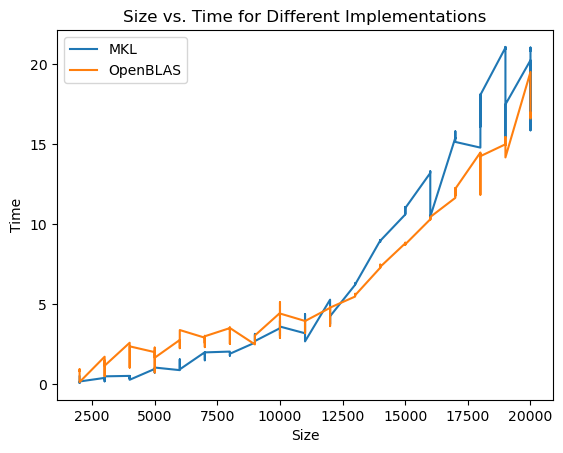

In [60]:
grouped = df_double.groupby('name')
fig, ax = plt.subplots()

# Plot a line for each group
for name, group in grouped:
    if name != 'Rownumber':
        ax.plot(group['Size'], group['Time'], label=name)  # Change 'Time' to 'GFLOPS' for a different plot

# Add labels and legend
ax.set_xlabel('Size')
ax.set_ylabel('Time')  # Change 'Time' to 'GFLOPS' for a different plot
ax.set_title('Size vs. Time for Different Implementations')
ax.legend()

# Show the plot
plt.show()

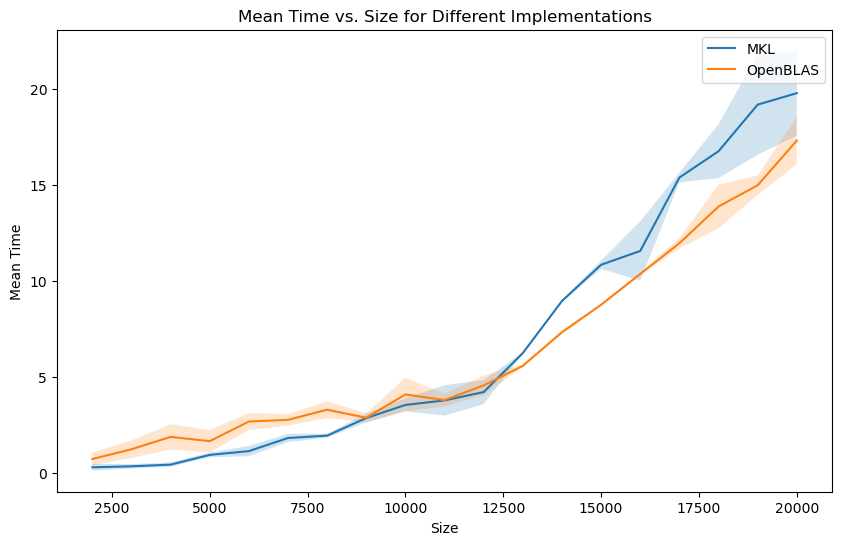

In [68]:
# Group the DataFrame by the 'name' and 'Size' columns
grouped = df_double.groupby(['name', 'Size'])

# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby('name'):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.title('Mean Time vs. Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.legend()

# Show the plot
plt.show()